<a href="https://colab.research.google.com/github/gveronese01/Data-Science/blob/master/Analisando_os_Dados_do_Airbnb_(Rio_de_Janeiro).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# Análise dos Dados do Airbnb - Rio de Janeiro

O [Airbnb](https://www.airbnb.com.br/)  permite aos indivíduos alugar o todo ou parte de sua própria casa, como uma forma de acomodação extra. No site encontramos uma plataforma de reserva, a fim de fornecer acomodações conforme necessidade das pessoas. O site do Airbnb apresenta mais de 500 mil anúncios em mais de 35 mil cidades e 192 países desde a sua criação no ano de 2008.
Ele fornece uma plataforma de busca e reservas entre a pessoa que oferece a acomodação e o turista que busca pela locação. Abrange mais de 500 mil anúncios em mais de 35.000 cidades e 192 países. Desde sua criação em Novembro de 2008 até Junho de 2012, mais de 10 milhões de reservas foram agendadas via Airbnb.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.melhoresdestinos.com.br/wp-content/uploads/2015/11/Dicas-Airbnb.jpg"></center>

A cidade do Rio de Janeiro é imensa e intensamento bonita aos olhos dos turistas que ali chegam. Sua rica paisagem contrasta, em algumas regiões, com os morros e favelas, refletindo a desigualdade social. <br>
Segundo a EMBRATUR (Agência Brasileira de Promoção Internacional do Turismo) a cidade do Rio de Janeiro é a cidade mais procurada por turistas estrangeiros que visitam o país a lazer, fazendo com que a procura por hospedagem seja sempre alta.

<center><img alt= width="50% src="https://diariodorio.com/wp-content/uploads/2019/02/rio-de-janeiro-juntos-pelo-rio-696x464.jpg"></center>
 





## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html)

Esta  análise exploratória inicial foi feita a partir do arquivo

* `listings.csv` 


In [34]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt

%matplotlib inline
print("pronto")

pronto


In [35]:
# importar o arquivo listings.csv do site do Airbnb para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-06-19/visualisations/listings.csv")

## Análise dos Dados

Foi feita uma relação das variáveis utilizadas nesta análise exploratória para uma melhor compreensão deste estudo.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Inciando a análise do nosso data set, verificamos, primeiramente, as 5 entradas iniciais.

In [36]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,191,7,251,2020-04-06,2.08,1,287
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,424,5,94,2020-03-22,1.22,1,93
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,159,7,238,2020-02-15,1.95,3,154
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,344,2,282,2020-03-02,2.33,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,482,2,181,2020-03-15,2.23,1,170




Identificamos a quantidade de entradas e quais os tipos que o nosso *dataset*, presente no site do Airbnb, possui. Este *dataset* foi baixado no site do Airbnb.<br>
Foi encontrado os seguintes tipos de variáveis:<br>



*   **int64** - número inteiro;
*   **float64** - número real;
*   **object** - texto ou mistura de dados numéricos e não numéricos;





In [37]:
# identificar o volume de dados do DataFrame
print("Entradas do dataset:\t {}".format(df.shape[0]))
print("Variáveis do dataset:\t {}\n".format(df.shape[1]))

# verificar os tipos das variáveis presentes no Dataset
display(df.dtypes)

Entradas do dataset:	 35731
Variáveis do dataset:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Valores ausentes no *dataset*?**

Uma etapa mais importante da análise de um dataset é a avaliação dos valores nulos/ausentes presentes. A qualidade de um dataset esta diretamente ligada à capacidade de limpeza e de corrigirmos estes ítens.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [38]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
100*(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)



neighbourhood_group               100.000000
reviews_per_month                  41.955165
last_review                        41.955165
name                                0.162324
host_name                           0.013993
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

**Qual o tipo de distribuição das variáveis?**<br> 
Montamos um histograma para representar a distribuição de frequência das variáveis estudadas.

Para identificar a distribuição das variáveis, irei plotar o histograma. Nele a altura de cada retângulo representa a frequência (absoluta ou relativa) e a base a classe a que ele representa.

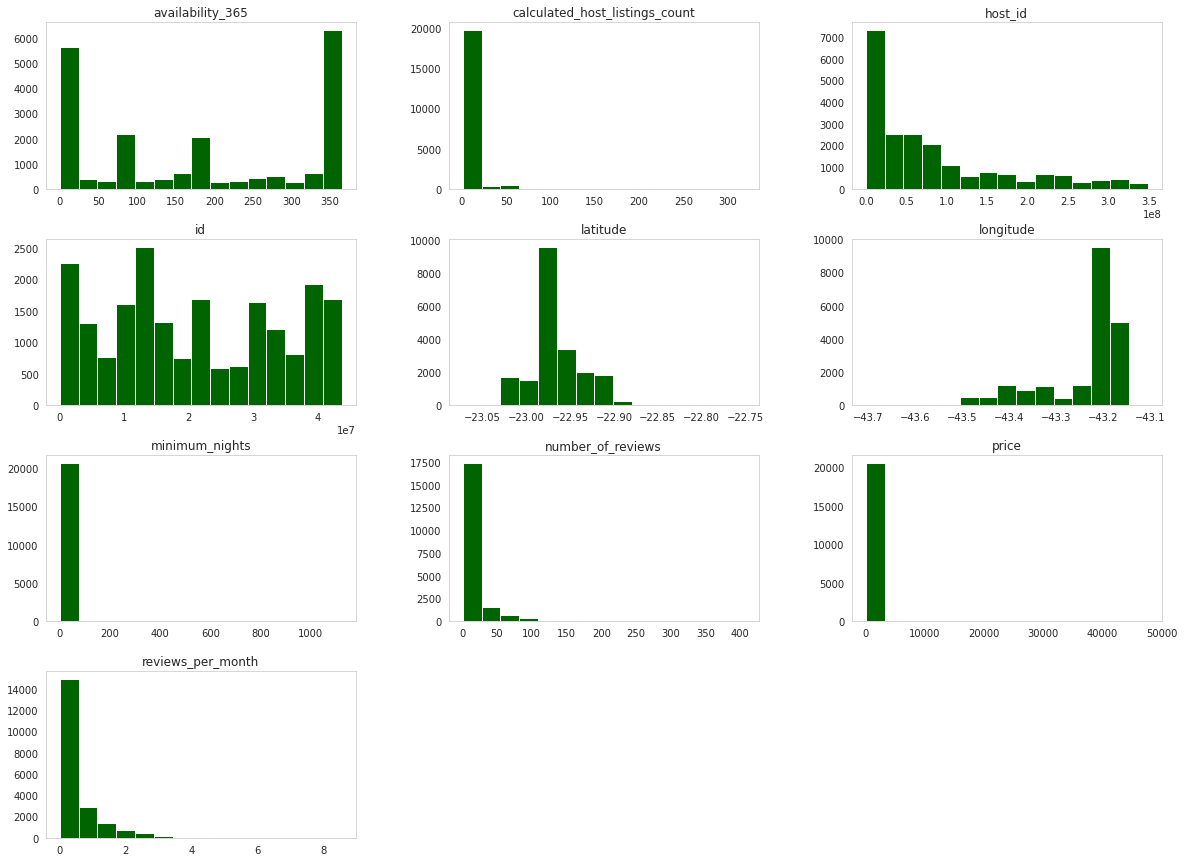

In [81]:
# histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,15), grid=False, color="darkgreen");

### **Há *outliers* presentes?**


Os outliers são valores atípicos que apresentam grande afastamento dos demais da sérire.
Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Observamos outliers nas variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Podemos também detectar os outliers através destes  métodos a seguir:

* Resumo estatístico das variáveis por meio do método `describe()` <br>
Ao aplicar este método, descobrimos a mediana, o desvio padrão, a média, o valor mínimo, o valor do primeiro quartil (25%), terceiro quartil (75%) e valor máximo.




* Plotar `boxplots` para a variável.
<center><img alt= width="10% src="https://www.researchgate.net/profile/Avijit_Hazra/publication/292177058/figure/fig6/AS:351004659863554@1460697440080/A-horizontal-box-plot-depicting-the-five-number-summary-of-numerical-data-Note-that-this.png"></center>



*   Cálculo do **IQR**, onde:<br>
IQR (interquatile range) é a diferença entre Q3 e Q1 (Q3-Q1). <br>
Q1 = 25% Primeiro Quartil;<br>
Q3 = 75% Terceiro Quartil;<br><br>
 Uma regra bastante usada afirma que um dado é um outlier quando ele é maior que 1.5*IQR acima do terceiro quartil ou abaixo do primeiro quartil. Em outras palavras, outliers baixos estão abaixo de Q1-1.5IQR
e outliers altos estão acima de Q3+1.5IQR. <br>
Neste método necessitaremos:<br>


*   Definir o Q1 e Q3 para as variáveis que serão limpas;
*   Calcular o IQR para as variáveis;
*   Definir o limite superior e inferior para cortar os outliers;
*   Remover os outliers;  







In [40]:
# excluindo colunas com dados faltantes
df.drop(columns=['neighbourhood_group'], inplace=True)

# excluindo entradas com dados faltantes
df.dropna(axis=0, inplace=True)

# convertendo os tipos de dados
df[['price','latitude', 'longitude']] = df[['price','latitude', 'longitude']].astype('float')

# ver o resumo estatístico das variáveis numéricas
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.073600e+04,2.073600e+04,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000
mean,2.106531e+07,8.209675e+07,-22.966846,-43.238119,427.950328,3.996094,16.600309,0.545603,4.928241,180.731626
std,1.334768e+07,8.848809e+07,0.032202,0.087643,1332.130069,20.665346,31.894903,0.729699,13.865542,147.623027
min,1.787800e+04,1.173900e+04,-23.072860,-43.704380,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,1.043422e+07,1.337242e+07,-22.984230,-43.240930,139.000000,2.000000,2.000000,0.110000,1.000000,1.000000
50%,1.972183e+07,5.067139e+07,-22.971730,-43.193450,228.000000,2.000000,5.000000,0.260000,1.000000,178.000000
75%,3.261209e+07,1.157833e+08,-22.953898,-43.184930,402.000000,3.000000,15.000000,0.680000,3.000000,358.000000
max,4.371127e+07,3.482936e+08,-22.750500,-43.104620,47623.000000,1123.000000,406.000000,8.550000,319.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses de outliers como:

* A variável `price` possui 75% dos valores abaixo de 400, porém seu valor máximo é maior que 47000;
* A quantidade mínima de noites (`minimum_nights`) possui o valor do campo max muito acima dos 75% dos valores (3º Quartil);




In [41]:
# identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites  superior e inferior                                     
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior da variável price: ', sup_price)
print('Limite inferior da variável price: ', inf_price)

IQR da variável price:  263.0
Limite superior da variável price:  796.5
Limite inferior da variável price:  -255.5


Obtivemos um valor inferior a zero na variável price como limite inferior, o que deve ser tratado.

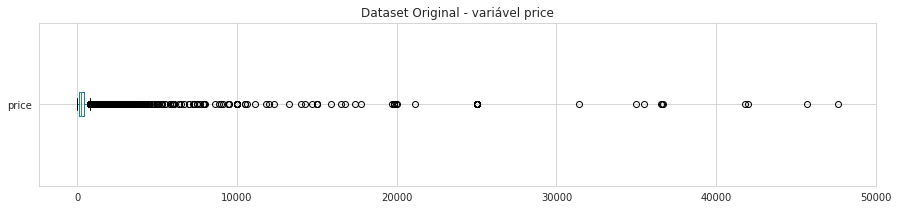

1948 Entradas acima do limite superior sup_price
Representam 9.39% do dataset


In [86]:
# BOX PLOT - verificando o dataset original da variável price
fig, ax = plt.subplots(figsize=(15,3))
df["price"].plot(kind='box', vert=False);
ax.set_title('Dataset Original - variável price')
plt.show()
#print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima do limite superior sup_price".format(len(df[df["price"] > sup_price])))
print("Representam {:.2f}% do dataset".format((len(df[df["price"] > sup_price]) / df.shape[0])*100))

In [43]:
#limpando o dataset. Fazemos uma cópia do dataset original
df_clean=df.copy()

In [44]:
df_clean.drop(df_clean[df_clean.price > sup_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)

print('Entradas do Dataset antes da limpeza: ', df.shape)
print('Entradas do Dataset após a limpeza: ',df_clean.shape)

Entradas do Dataset antes da limpeza:  (20736, 15)
Entradas do Dataset após a limpeza:  (18784, 15)


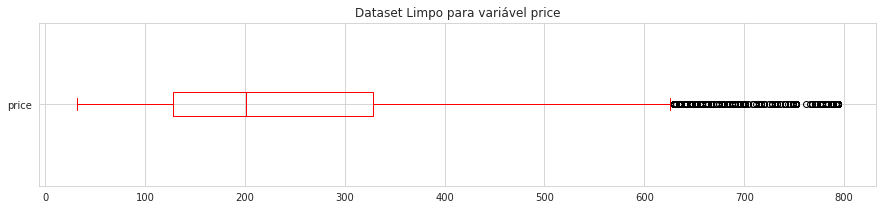

In [102]:
# verificando o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean["price"].plot(kind='box', vert=False, color="r");
ax.set_title('Dataset Limpo para variável price')
plt.show()


In [46]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior da variável minimum_nights: ', sup_minimum_nights)
print('Limite inferior da variável minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  1.0
Limite superior da variável minimum_nights:  4.5
Limite inferior da variável minimum_nights:  0.5


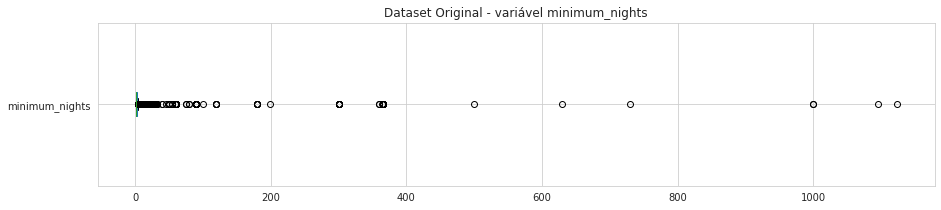

3082 Entradas acima do limite superior minimum_nights
Representam 14.86% do dataset


In [47]:
# BOX PLOT - verificando o dataset original da minimum_nights
fig, ax = plt.subplots(figsize=(15,3))
df["minimum_nights"].plot(kind='box', vert=False);
ax.set_title('Dataset Original - variável minimum_nights')
plt.show()

print("{} Entradas acima do limite superior minimum_nights".format(len(df[df["minimum_nights"] > sup_minimum_nights])))
print("Representam {:.2f}% do dataset".format((len(df[df["minimum_nights"] > sup_minimum_nights]) / df.shape[0])*100))

In [88]:
#Limpando os dados da variável minimum_nights
df_clean.drop(df_clean[df_clean.minimum_nights > sup_minimum_nights].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights < inf_minimum_nights].index, axis=0, inplace=True)

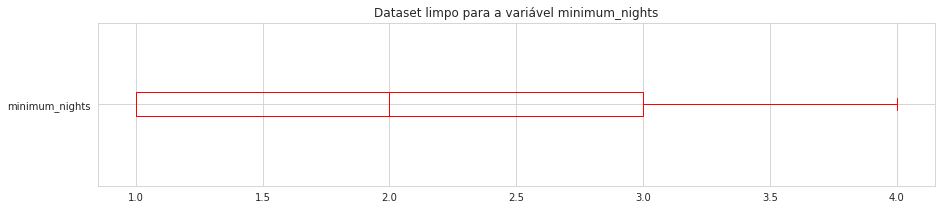

In [101]:
fig, ax=plt.subplots(figsize=(15,3))
df_clean["minimum_nights"].plot(kind="box", vert=False, color="r");
ax.set_title("Dataset limpo para a variável minimum_nights")
plt.show()


#### Descrição estatística e  Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

In [51]:
#Descrição estatística sem outliers;
df_clean.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,16173.0,16173.0,16173.0,16173.0,16173.0,16173.0,16173.0,16173.0,16173.0,16173.0
mean,21801946.7,86305072.8,-23.0,-43.2,249.7,2.1,18.2,0.6,4.7,180.6
std,13323406.5,90364437.5,0.0,0.1,160.4,0.9,33.8,0.8,12.7,146.5
min,31560.0,11739.0,-23.1,-43.7,32.0,1.0,1.0,0.0,1.0,0.0
25%,10947970.0,13895463.0,-23.0,-43.2,128.0,1.0,2.0,0.1,1.0,2.0
50%,21093473.0,54398007.0,-23.0,-43.2,201.0,2.0,5.0,0.3,1.0,178.0
75%,33451471.0,126839078.0,-23.0,-43.2,328.0,3.0,18.0,0.8,3.0,358.0
max,43711270.0,348293564.0,-22.8,-43.1,794.0,4.0,406.0,8.6,200.0,365.0


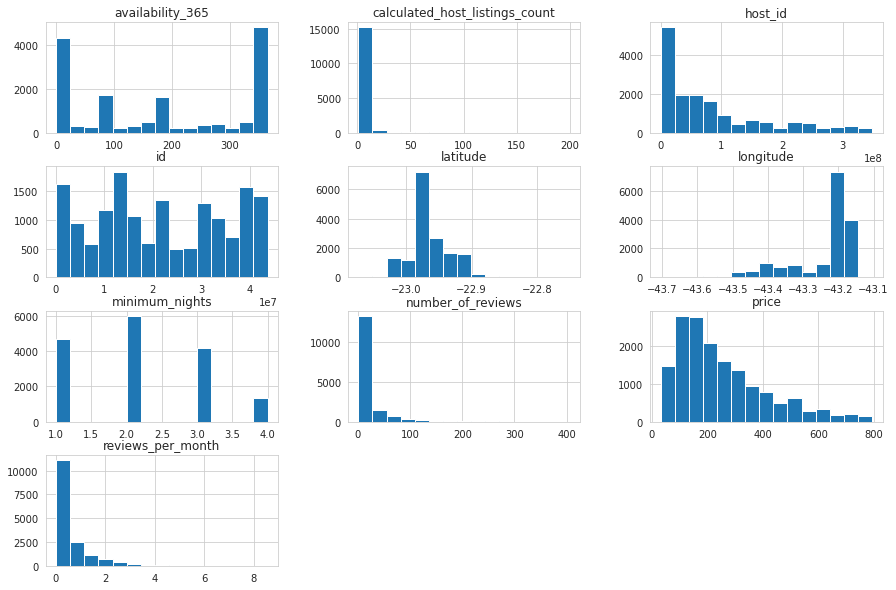

In [73]:
# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Quando uma variável interfere na outra não importando se de forma positiva ou negativa, pode-se dizer que existe uma correlação entre essas variáveis.Criei uma matriz de correlação entre as variáveis *'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'latitude', 'longitude', 'calculated_host_listings_count', 'availability_365'*.<br>


In [90]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'latitude', 'longitude','availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,latitude,longitude,availability_365
price,1.000000,0.166543,-0.089984,-0.135036,0.116780,-0.261191,-0.041824,0.022153
minimum_nights,0.166543,1.000000,0.022211,-0.058781,0.015840,-0.115046,0.122849,-0.040677
number_of_reviews,-0.089984,0.022211,1.000000,0.726502,-0.026386,-0.066042,0.113481,0.032246
reviews_per_month,-0.135036,-0.058781,0.726502,1.000000,-0.020392,-0.061169,0.079717,-0.018407
calculated_host_listings_count,0.116780,0.015840,-0.026386,-0.020392,1.000000,-0.087056,0.054033,0.077922
latitude,-0.261191,-0.115046,-0.066042,-0.061169,-0.087056,1.000000,0.390684,-0.014953
longitude,-0.041824,0.122849,0.113481,0.079717,0.054033,0.390684,1.000000,-0.046154
availability_365,0.022153,-0.040677,0.032246,-0.018407,0.077922,-0.014953,-0.046154,1.000000


O mapa de calor representa de forma colorida as correlações entre as variáveis e que foram abordadas na tabela acima, facilitando a interpretação quando se possui muitas variáveis;

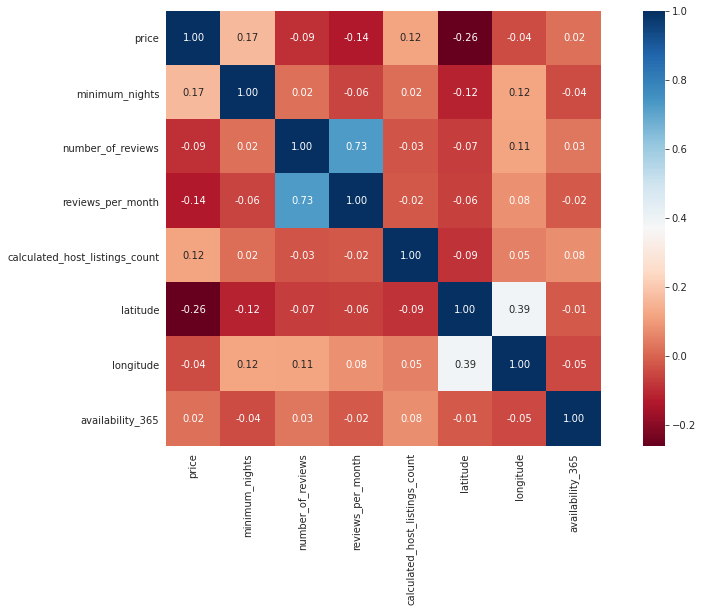

In [54]:
#heatmap
plt.subplots(figsize=(15, 8))
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Observamos que:

*   A variável *price* está fortemente ligada negativamente com a variável *latitude*, evidenciando que os preços na região norte são menores que o da região sul da cidade.
* A variável *minimum_nights* tende a ter valores maiores com o aumento do variável *price*.




### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável `room_type` nos indica os tipos de quartos disponíveis para locação.
Vamos  quantificar esta variável, usando o método `value_counts()`.

In [91]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    10966
Private room        4779
Shared room          318
Hotel room           110
Name: room_type, dtype: int64

In [74]:
# mostrar a porcentagem de cada tipo de imóvel disponível
100*(df_clean.room_type.value_counts() / df_clean.shape[0])

Entire home/apt    67.804365
Private room       29.549249
Shared room         1.966240
Hotel room          0.680146
Name: room_type, dtype: float64

* Os imóveis do tipo apartamento por inteiro correspondem a 67% do nosso datset;
* O aluguel do tipo  quarto individual, representa quase 30%;

### **Q6. Qual a localidade mais cara do Rio?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [92]:
bairros=df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]
bairros

neighbourhood
Abolição             392.500000
Leblon               358.545338
Ipanema              322.586694
Sepetiba             321.000000
Lagoa                301.102041
Barra da Tijuca      297.045991
Guaratiba            296.933333
São Conrado          291.550725
Paquetá              287.809524
Alto da Boa Vista    287.500000
Name: price, dtype: float64

In [93]:
bairros.index

Index(['Abolição', 'Leblon', 'Ipanema', 'Sepetiba', 'Lagoa', 'Barra da Tijuca',
       'Guaratiba', 'São Conrado', 'Paquetá', 'Alto da Boa Vista'],
      dtype='object', name='neighbourhood')

In [94]:
print(df_clean["neighbourhood"][df_clean.neighbourhood == "Abolição"].value_counts())
print(df_clean["neighbourhood"][df_clean.neighbourhood == "Leblon"].value_counts())
print(df_clean["neighbourhood"][df_clean.neighbourhood == "Sepetiba"].value_counts())
print(df_clean["neighbourhood"][df_clean.neighbourhood == "Ipanema"].value_counts())
print(df_clean["neighbourhood"][df_clean.neighbourhood == "Guaratiba"].value_counts())
print(df_clean["neighbourhood"][df_clean.neighbourhood == "Barra da Tijuca"].value_counts())
print(df_clean["neighbourhood"][df_clean.neighbourhood == "Lagoa"].value_counts())
print(df_clean["neighbourhood"][df_clean.neighbourhood == "São Conrado"].value_counts())
print(df_clean["neighbourhood"][df_clean.neighbourhood == "Paquetá"].value_counts())
print(df_clean["neighbourhood"][df_clean.neighbourhood == "Alto da Boa Vista"].value_counts())

Abolição    2
Name: neighbourhood, dtype: int64
Leblon    783
Name: neighbourhood, dtype: int64
Sepetiba    2
Name: neighbourhood, dtype: int64
Ipanema    1488
Name: neighbourhood, dtype: int64
Guaratiba    15
Name: neighbourhood, dtype: int64
Barra da Tijuca    1609
Name: neighbourhood, dtype: int64
Lagoa    147
Name: neighbourhood, dtype: int64
São Conrado    69
Name: neighbourhood, dtype: int64
Paquetá    21
Name: neighbourhood, dtype: int64
Alto da Boa Vista    12
Name: neighbourhood, dtype: int64


In [95]:
bairros.round(2)

neighbourhood
Abolição             392.50
Leblon               358.55
Ipanema              322.59
Sepetiba             321.00
Lagoa                301.10
Barra da Tijuca      297.05
Guaratiba            296.93
São Conrado          291.55
Paquetá              287.81
Alto da Boa Vista    287.50
Name: price, dtype: float64

O bairro da Abolição e Sepetiba estão entre os mais caros, porém avaliando o número de entradas a respeito deste bairro, percebe-se que não é um número significativo em comparação com os outros bairro da cidade do Rio de Janeiro.

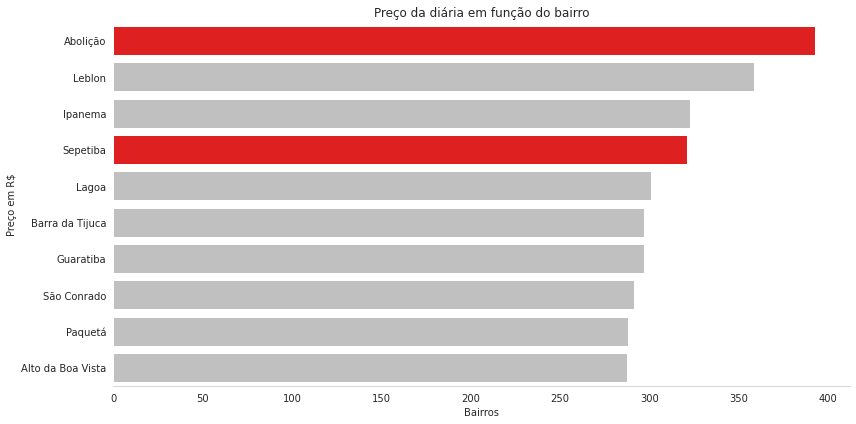

In [103]:


idx=np.array(bairros.values)
values =np.array(list(bairros.index))

fig, ax=plt.subplots(figsize=(12,6))
sns.set_style("whitegrid")
clrs = ['r' if (x == "Sepetiba" or x == "Abolição") else 'silver' for x in values ]
sns.barplot(x=idx, y=values, palette=clrs, orient="h") # color=clrs)

plt.title("Preço da diária em função do bairro")
plt.xlabel("Bairros")
plt.ylabel("Preço em R$")
sns.despine(left=True, right=True)
ax.grid(False)
ax.set_autoscalex_on

plt.tight_layout()







Para o bairro de Sepetiba e Abolição temos apenas 2 entradas, não sendo um valor significativo para análise.

In [62]:
# ver quantidade e entradas de imóveis no bairro Sepetiba
print(df_clean[df_clean.neighbourhood == "Sepetiba"].shape) 
df_clean[df_clean.neighbourhood == "Sepetiba"]


(2, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
17106,16147943,Suíte em casa perto da praia de Sepetiba,92203034,Diogo,Sepetiba,-22.97267,-43.70438,Private room,42.0,1,1,2017-12-31,0.03,1,0
18722,19046964,Sítio com ampla casa para temporada Sepetiba,132940942,Fabio,Sepetiba,-22.98501,-43.68905,Entire home/apt,600.0,2,1,2019-03-17,0.06,1,354


In [63]:
# ver quantidade e entradas de imóveis no bairro Abolição
print(df_clean[df_clean.neighbourhood == "Abolição"].shape)
df_clean[df_clean.neighbourhood == "Abolição"]

(2, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7905,10210202,2BD 1BA north Rio - Olympic Stadium,24950202,Dionisio,Abolição,-22.88792,-43.29617,Entire home/apt,584.0,1,1,2016-08-22,0.02,1,364
33053,41882674,Yellow house,331188386,Andréa,Abolição,-22.89063,-43.29994,Entire home/apt,201.0,3,1,2020-02-28,0.27,1,0


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

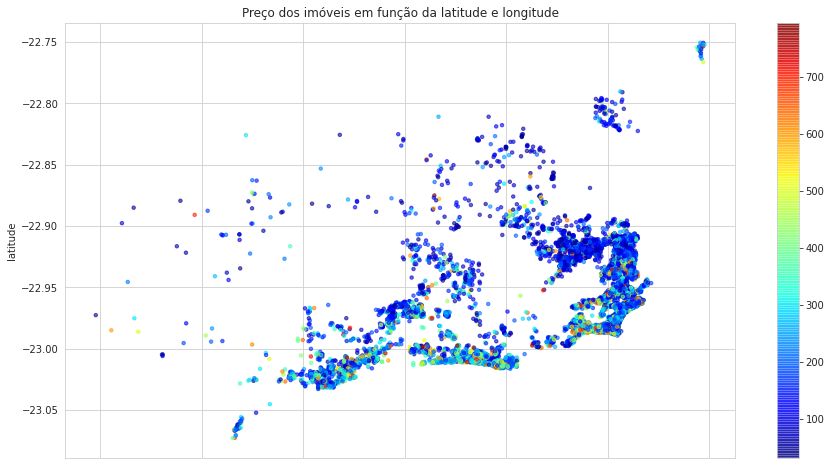

In [79]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.6, c=df_clean['price'], s=12,
              cmap=plt.get_cmap('jet'), figsize=(15,8), title="Preço dos imóveis em função da latitude e longitude");
          

## Conclusões

- Foi feita uma análise inicial da qualidade dos dados. Avaliou-se dados faltantes e através de uma análise estatística os *outliers*;<br>
* Os dados foram tratados de forma a se remover as entradas com dados faltantes, nulos e a remoção dos outliers.<br>
- A região mais ao sul da cidade possui valores mais caros, como observamos na tabela de correlação, mapa de calor e na figura onde aparece o mapa da cidade;<br>
* Os imóveis com número mínimo de noites maiores tendem a ser os mais caros.
* Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos, sendo os bairros Leblon e Ipanema os mais caros do nosso dataset.

